# Simulation to Get Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
k_T = 5
k_R = 4
S_0 = 0.5

In [3]:
# Compliance functions
def f_T(S):
    return 1/(1+np.exp(-k_T*(S-S_0)))
def f_R(S):
    return 1/(1+np.exp(-k_R*(S-S_0)))

In [4]:
# Accident occurence function
def A(S):
    return 1-f_T(S)*f_R(S)

In [5]:
# Simulation range for S
S_values = np.linspace(0,1,100)
A_values = [A(S) for S in S_values]

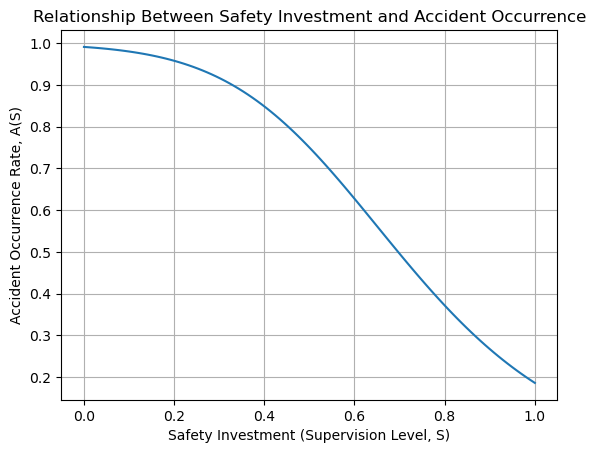

In [6]:
# Plot the relationship
plt.plot(S_values, A_values, label='Accident Occurrence Rate')
plt.xlabel('Safety Investment (Supervision Level, S)')
plt.ylabel('Accident Occurrence Rate, A(S)')
plt.title('Relationship Between Safety Investment and Accident Occurrence')
plt.grid(True)
plt.show()

# Build a Decision-Making Model

In [7]:
from scipy.optimize import minimize

In [8]:
# Define total cost function
C_a = 100 # Accident cost constant
C_s = 50 # Supervision cost constant

def total_cost(S):
    return C_a*A(S)+C_s*S**2

In [9]:
# Optimize the total cost function
result = minimize(total_cost, x0=0.5, bounds=[(0,1)])
S_optimal = result.x[0]
print(f"Optimal Safety Investment Level (S*): {S_optimal}")

Optimal Safety Investment Level (S*): 0.9086250609468238


# Visualizing Compliance Probability

In [10]:
# Supervision levels
S_values = np.linspace(0, 1, 100)

In [11]:
# Compute compliance probabilities
f_T_values = f_T(S_values)
f_R_values = f_R(S_values)

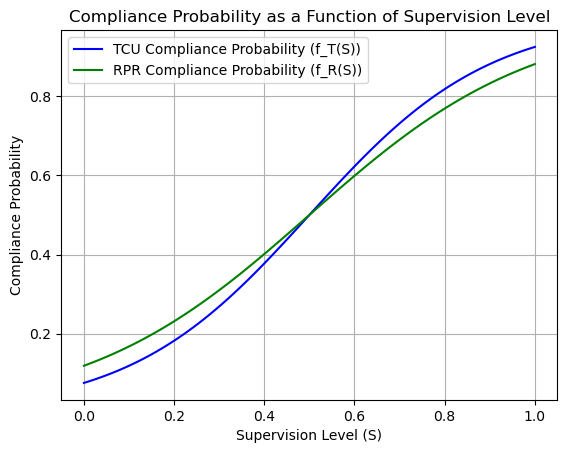

In [12]:
# plot the compliance probabilities
plt.plot(S_values, f_T_values, label="TCU Compliance Probability (f_T(S))", color='blue')
plt.plot(S_values, f_R_values, label="RPR Compliance Probability (f_R(S))", color='green')
plt.xlabel("Supervision Level (S)")
plt.ylabel("Compliance Probability")
plt.title("Compliance Probability as a Function of Supervision Level")
plt.legend()
plt.grid(True)
plt.show()

# Generate Simulated Data

In [13]:
import numpy as np
import pandas as pd

In [14]:
np.random.seed(42)

In [15]:
# number of samples
n_samples = 1000

In [16]:
# Generate random supervision levels (S) between 0 and 1
supervision_levels = np.random.uniform (0,1,n_samples)

In [17]:
# Parameters for compliance probability (logistic model)
k_T = 5
k_R = 4
S_0 = 0.5

In [18]:
# Compliance probability functions
def f_T(S):
    return 1/(1+np.exp(-k_T*(S-S_0)))
def f_R(S):
    return 1/(1+np.exp(-k_R*(S-S_0)))

In [19]:
# Accident occurrence rate based on compliance
def A(S):
    return 1-f_T(S)*f_R(S)

In [20]:
# Generate compliance probabilities and accident occurrence rates
compliance_TCU = f_T(supervision_levels)
compliance_RPR = f_R(supervision_levels)
accident_rates = A(supervision_levels)

In [21]:
# Generate penalties for non-compliance (random 50-150)
penalties = np.random.uniform(50,150,n_samples)

In [22]:
# Generate maintenance costs (random 100-500)
maintenance_costs = np.random.uniform(100,500,n_samples)

In [23]:
# Generate accident perception coefficients (random 0.1-1.0)
accident_perception = np.random.uniform(0.1,1.0,n_samples)

In [24]:
# Create a DataFrame with the generated data
data = pd.DataFrame({
    'supervision_level':supervision_levels,
    'compliance_TCU':compliance_TCU,
    'compliance_RPR':compliance_RPR,
    'accident_rate':accident_rates,
    'penalty':penalties,
    'maintenance_cost':maintenance_costs,
    'accident_perception':accident_perception
})

In [25]:
# Save the generated data to a CSV file
data.to_csv('simulated_tower_crane_safety_data.csv', index=False)

In [26]:
print(data.head())

   supervision_level  compliance_TCU  compliance_RPR  accident_rate  \
0           0.374540        0.348123        0.377108       0.868720   
1           0.950714        0.904958        0.858496       0.223097   
2           0.731994        0.761327        0.716664       0.454384   
3           0.598658        0.620882        0.597398       0.629087   
4           0.156019        0.151883        0.201664       0.969371   

      penalty  maintenance_cost  accident_perception  
0   68.513293        204.682273             0.705433  
1  104.190095        198.791520             0.817013  
2  137.294584        462.501832             0.325421  
3  123.222489        199.818480             0.662387  
4  130.656115        208.779890             0.614571  


In [27]:
print(data)

     supervision_level  compliance_TCU  compliance_RPR  accident_rate  \
0             0.374540        0.348123        0.377108       0.868720   
1             0.950714        0.904958        0.858496       0.223097   
2             0.731994        0.761327        0.716664       0.454384   
3             0.598658        0.620882        0.597398       0.629087   
4             0.156019        0.151883        0.201664       0.969371   
..                 ...             ...             ...            ...   
995           0.091582        0.114854        0.163328       0.981241   
996           0.917314        0.889591        0.841476       0.251430   
997           0.136819        0.139926        0.189582       0.973473   
998           0.950237        0.904753        0.858264       0.223483   
999           0.446006        0.432914        0.446215       0.806827   

        penalty  maintenance_cost  accident_perception  
0     68.513293        204.682273             0.705433  
1    104.

# Develop an ML Model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
data = pd.read_csv('simulated_tower_crane_safety_data.csv')

In [30]:
X = data[['supervision_level','penalty','maintenance_cost','accident_perception']]
y = data['accident_rate']

In [31]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# Make prediction
y_pred = model.predict(X_test)

In [34]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 7.11835570893669e-07
Root Mean Squared Error (RMSE): 0.000843703485173357
R-squared (R²): 0.9999895182451424


### Results Visualization

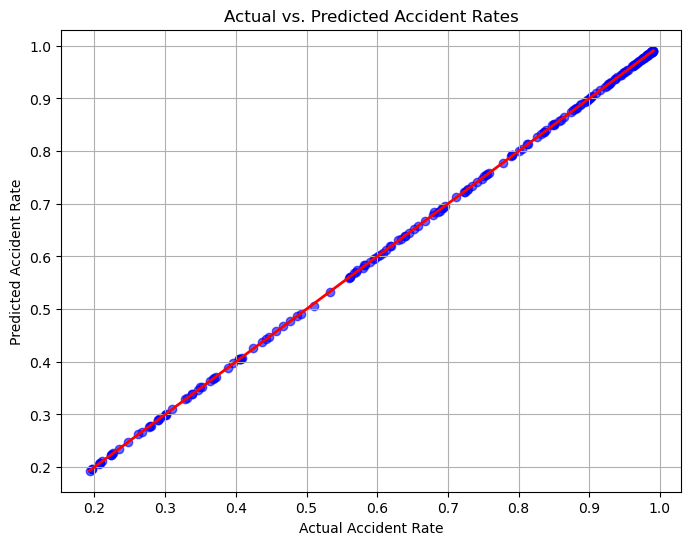

In [35]:
# Visualize the predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of perfect prediction
plt.xlabel('Actual Accident Rate')
plt.ylabel('Predicted Accident Rate')
plt.title('Actual vs. Predicted Accident Rates')
plt.grid(True)
plt.show()

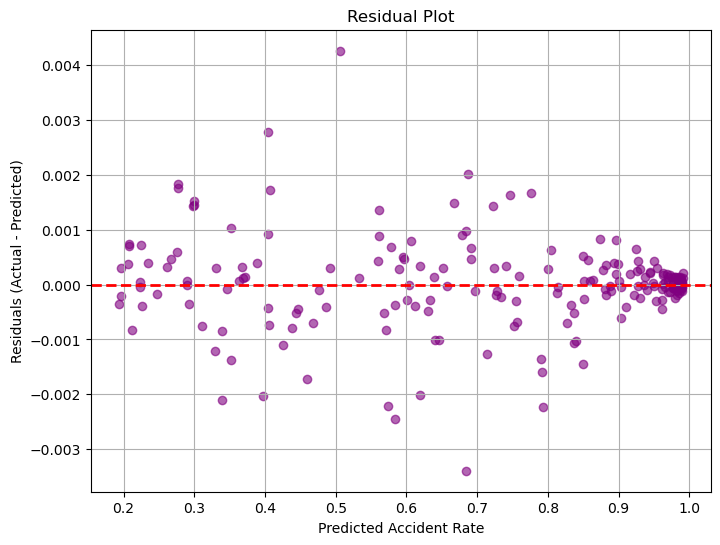

In [36]:
# Plot the residuals (errors between actual and predicted values)
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Accident Rate')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

### Feature Importance

In [39]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns

In [41]:
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature':feature_names,
    'Importance':importances
}).sort_values(by='Importance',ascending=False)

print(feature_importance_df)

               Feature  Importance
0    supervision_level    0.999972
1              penalty    0.000010
2     maintenance_cost    0.000010
3  accident_perception    0.000007


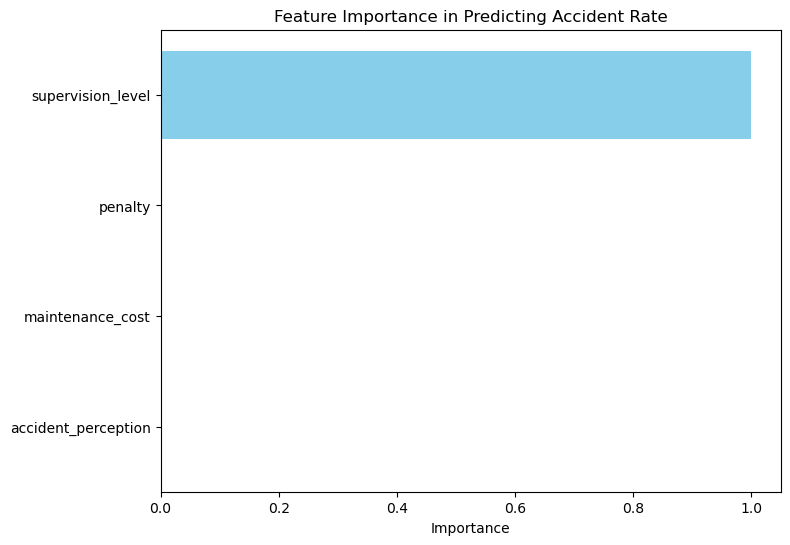

In [42]:
# Optional: Plotting feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Predicting Accident Rate')
plt.gca().invert_yaxis()
plt.show()

### Optimize and Tune the Model

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[10,20,30],
    'min_samples_split':[2,5,10]
}

In [45]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,  cv=5)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
